The Objetive of the NMF is Find two non-negative matrices (W, H) whose product approximates the non-negative matrix X.
This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

# Using Scikit-learn
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [1]:
import numpy as np
from sklearn.decomposition import NMF

Defining the model

In [2]:
K = 3
model = NMF(n_components=K,init='nndsvdar',random_state=1) 
model

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvdar', l1_ratio=0.0,
  max_iter=200, n_components=3, random_state=1, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

A test Array

In [9]:
import pandas as pd
Original = [[5,3,0,1,4,1],
     [4,0,0,3,1,1],
     [1,8,2,1,0,0],
     [1,4,1,0,0,1],
     [0,1,7,1,5,0]]
Original = np.array(Original)

In [10]:
W = model.fit_transform(Original)
H = model.components_

In [11]:
print("W")
print(W)
print("H")
print(H)

W
[[  7.11895523e-01   5.96403532e-02   2.31991623e+00]
 [  0.00000000e+00   0.00000000e+00   1.84397182e+00]
 [  2.31415571e+00   1.53726136e-01   0.00000000e+00]
 [  1.17083564e+00   0.00000000e+00   1.77326417e-01]
 [  1.41670544e-03   3.40462097e+00   0.00000000e+00]]
H
[[ 0.43918573  3.45085476  0.68869731  0.18432887  0.          0.1413571 ]
 [ 0.          0.29293663  2.05379032  0.29491054  1.47093367  0.        ]
 [ 2.08043206  0.13760857  0.          0.84735597  1.23899523  0.46273583]]


Now lets see how mush close to X are WxH and lets call it crossValue

In [12]:
crossValue = np.dot(W,H)
print("crossValue \n",crossValue)
print("rounded Values\n",np.round(crossValue))
print("Original\n",Original)

crossValue 
 [[  5.13908244e+00   2.79335925e+00   6.12769311e-01   2.11460633e+00
    2.96209214e+00   1.17413985e+00]
 [  3.83625810e+00   2.53746326e-01   0.00000000e+00   1.56250053e+00
    2.28467229e+00   8.53271837e-01]
 [  1.01634416e+00   8.03084724e+00   1.90947406e+00   4.71901167e-01
    2.26120949e-01   3.27122339e-01]
 [  8.83129868e-01   4.06478537e+00   8.06351354e-01   3.66077410e-01
    2.19706585e-01   2.47561218e-01]
 [  6.22196814e-04   1.00222702e+00   6.99335328e+00   1.00431974e+00
    5.00797162e+00   2.00261372e-04]]
rounded Values
 [[ 5.  3.  1.  2.  3.  1.]
 [ 4.  0.  0.  2.  2.  1.]
 [ 1.  8.  2.  0.  0.  0.]
 [ 1.  4.  1.  0.  0.  0.]
 [ 0.  1.  7.  1.  5.  0.]]
Original
 [[5 3 0 1 4 1]
 [4 0 0 3 1 1]
 [1 8 2 1 0 0]
 [1 4 1 0 0 1]
 [0 1 7 1 5 0]]


In [13]:
import matplotlib.pyplot as plt
def plotCompare(Original,prediction):
    N = Original.shape[0]
    last = Original.shape[1]-1
    ind = np.arange(N)  # the x locations for the groups
    width = 0.17       # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, Original[:,last], width, color='r')
    rects2 = ax.bar(ind + width, prediction[:,last], width, color='b')
    rects3 = ax.bar(ind + width+width, np.round(prediction[:,last]), width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Death Probability')
    ax.set_title('Comparation of Values')
    ax.set_xticks(ind+ width / last)
    ax.set_xticklabels(('G1', 'G2', 'G3', 'G4','G5','G6'))

    ax.legend((rects1[0], rects2[0], rects3[0]), ('Original', 'Cross Value','Round Cross Value'))

    plt.show()

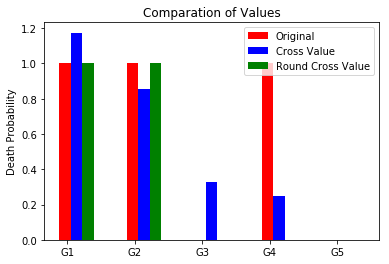

In [14]:
plotCompare(Original,crossValue)